# Optimización del Activo
## Import de paquetes y funciones

In [1]:
library("readxl")
library("lubridate")
library('tidyr')
library('ggplot2')
library('YieldCurve')
library('dplyr')

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'YieldCurve' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:xts':

    first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:

In [2]:
search()

[1] ".GlobalEnv"         "package:dplyr"      "package:YieldCurve"
 [4] "package:xts"        "package:zoo"        "package:ggplot2"   
 [7] "package:tidyr"      "package:lubridate"  "package:readxl"    
[10] "jupyter:irkernel"   "jupyter:irkernel"   "package:stats"     
[13] "package:graphics"   "package:grDevices"  "package:utils"     
[16] "package:datasets"   "package:methods"    "Autoloads"         
[19] "package:base"

In [3]:
source("helpers.R")

## Simulación de personas

In [4]:
pathmort <- 'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/Mortality.xlsx'

In [5]:
mortality <- read_excel(pathmort, sheet=1,skip=2, col_names=c('age','i_m','d_m','q_m','e_m','age_2','i_f','d_f','q_f','e_f'))
mortality <- mortality[,c(1,4,9)]
mortality <- data.frame(lapply(mortality, function(x) as.numeric(as.character(x))))
head(mortality)

,age,q_m,q_f
,<dbl>,<dbl>,<dbl>
1,50,0.003353,0.001880
2,51,0.003641,0.002042
3,52,0.003956,0.002219
4,53,0.004301,0.002412
5,54,0.004681,0.002625
6,55,0.005050,0.002833


In [38]:
simulaciones <- function(future=60){
    t_ages<- list()
    for (i in 50:89){
        m=7500
        f=7500
        t_l <- c(15000)
        k <- i-1
        for (j in 1:future){
            s <- k+j
            if (s<110){
               p_m <- mortality[mortality$age==s,2]
               p_f <- mortality[mortality$age==s,3]
            }
            else {
               p_m <- 1
               p_f <- 1
            }
            m <- sum(rbinom(m, size=1, prob= (1-p_m)))
            f <- sum(rbinom(f, size=1, prob= (1-p_f)))
            t_l <- c(t_l, (m+f) )
        }
    t_ages<- c(t_ages, t_l)
    }
    t_ages <- as.data.frame(matrix(t_ages, byrow=TRUE, nrow= length(c(50:89)) ))
    t_ages <- data.frame(lapply(t_ages, function(x) as.numeric(as.character(x))))
    t_sum <- colSums(t_ages)
return(t_sum) 
}

In [23]:
mortality[mortality$age==51,2]

[1] 0.003641

In [39]:
future <- 30
sims <- data.frame(matrix(NA, nrow = 1000, ncol = (future+1)))
for (i in 1:1000){
    sims[i,] <- simulaciones(future)
}


In [40]:
sims

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6e+05,583656,566680,548964,530915,512597,493894,474947,455990,436708,...,228000,213406,199373,185737,172633,159779,147440,135248,123804,112810
6e+05,583664,566734,549299,531424,513162,494365,475349,456091,436898,...,228122,213550,199456,185907,172522,159830,147355,135323,123820,112814
6e+05,583829,566945,549234,531058,512716,493941,474953,455312,436267,...,227943,213285,199241,185779,172910,160110,147695,135871,124316,113171
6e+05,583726,566924,549303,531231,512730,493955,474648,455380,436024,...,228097,213559,199544,185868,172730,159689,147471,135454,123774,112592
6e+05,583794,566854,549166,531206,512760,494106,475218,456113,436858,...,228412,213876,199888,186192,172947,159961,147483,135651,124207,112928
6e+05,583761,566678,549167,531082,512697,493904,474781,455759,436455,...,228414,213694,199652,185940,172670,159762,147429,135374,123968,112955
6e+05,583717,566684,549086,531014,512460,493555,474478,455264,436145,...,228011,213460,199342,185665,172364,159424,147083,134998,123725,112632
6e+05,583434,566508,549068,530946,512551,493693,474653,455396,436103,...,228444,214050,199977,186231,172899,160041,147551,135563,123882,112748
6e+05,583987,567037,549456,530985,512656,493989,474644,455234,435976,...,228371,213761,199636,186076,172794,160005,147627,135732,124149,113068


In [41]:
write.csv(sims,'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/proyection.csv',row.names=F)

In [42]:
# install.packages('data.table')
library('data.table')

In [43]:
sims$id <- seq(1, 1000, 1)

In [44]:
long_sims <- melt(data= sims,id.vars='id', variable.name="period_f", value.name= "alive")

Warning message in melt(data = sims, id.vars = "id", variable.name = "period_f", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(sims). In the next version, this warning will become an error."

In [45]:
head(long_sims)

,id,period_f,alive
,<dbl>,<fct>,<dbl>
1,1,X1,6e+05
2,2,X1,6e+05
3,3,X1,6e+05
4,4,X1,6e+05
5,5,X1,6e+05
6,6,X1,6e+05


In [46]:
long_sims$period_f <- as.numeric(substring(as.character(long_sims$period_f), 2))

In [34]:
head(long_sims)

,id,period_f,alive
,<dbl>,<dbl>,<dbl>
1,1,1,6e+05
2,2,1,6e+05
3,3,1,6e+05
4,4,1,6e+05
5,5,1,6e+05
6,6,1,6e+05


In [47]:
long_sims$flow <- long_sims$alive*0.000018
c_l_sims <- long_sims %>%
            group_by(period_f) %>%
            summarise(alive = mean(alive), flow = mean(flow))


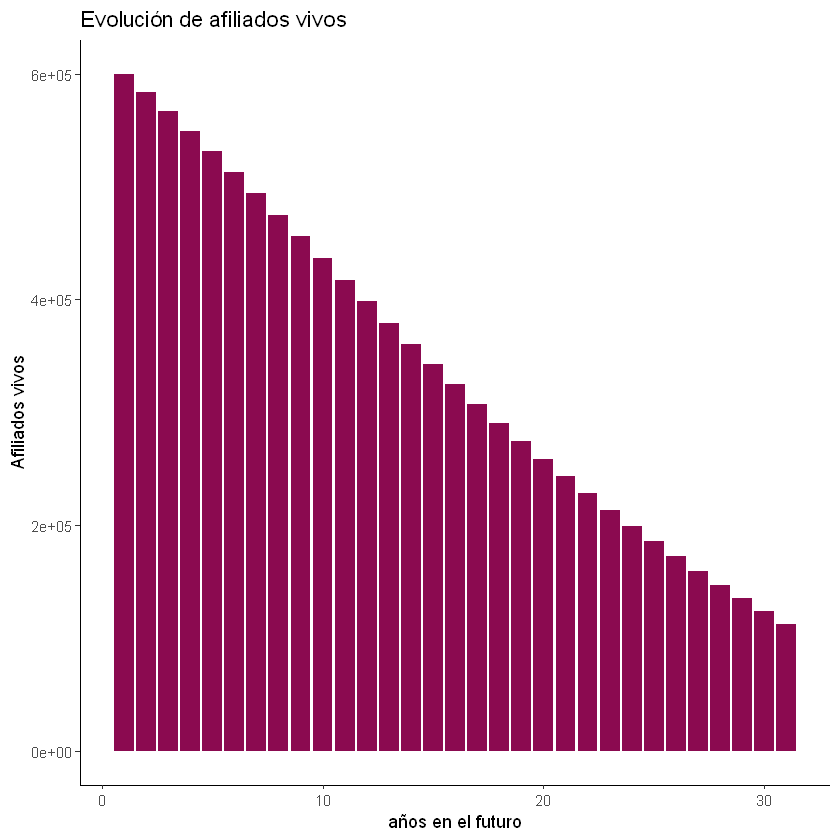

In [48]:
ggplot(c_l_sims,aes(period_f,alive))+  geom_col( fill='deeppink4') + labs(x="años en el futuro", y='Afiliados vivos',title='Evolución de afiliados vivos') +theme_classic()

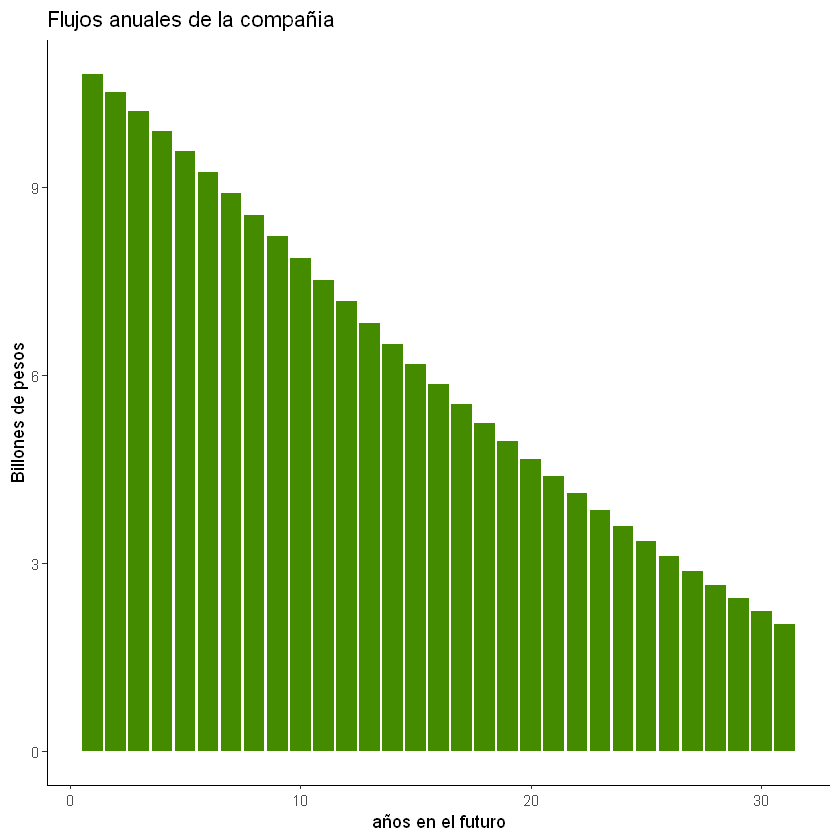

In [49]:

ggplot(c_l_sims,aes(period_f,flow))+ geom_col(fill='chartreuse4') + labs(x="años en el futuro", y='Billones de pesos',title='Flujos anuales de la compañia') +theme_classic()

In [49]:
head(long_sims)

,id,period_f,alive,flow
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,6e+05,10.8
2,2,1,6e+05,10.8
3,3,1,6e+05,10.8
4,4,1,6e+05,10.8
5,5,1,6e+05,10.8
6,6,1,6e+05,10.8


## Import de bases de datos de los indices
En esta sección se importan todos los datos de las tasas de interés de los bonos y activos requeridos.   
Adicionalmente, se encuentra la estimación de Nelson Sieguel para descomponer el comportamiento de las tasas.

In [2]:
path <- 'C:/Users/Diana C Contreras/OneDrive - Universidad de Los Andes/Riesgo Financiero/Talleres/T1-Riesgo/Taller 2/data/data.xlsx'

### Empezamos con los bonos TES en pesos.

In [3]:
tes_cop <- read_excel(path, sheet=1,skip=7, col_names=c('Date','6m','1y','3y','5y','10y','15y'))

In [4]:
tes_cop <- tes_cop[tes_cop$Date >= "2012-04-26",]
tes_cop <- as.data.frame(tes_cop)
# rownames(tes_cop) <- tes_cop$Date
# tes_cop <- tes_cop[,-c(1)]
tes_cop[,-c(1)] <- sapply(tes_cop[,-c(1)], as.numeric)
colnames( tes_cop) <- c('Date','tes_cop_6m','tes_cop_1y','tes_cop_3y','tes_cop_5y','tes_cop_10y','tes_cop_15y')
head(tes_cop)

,Date,tes_cop_6m,tes_cop_1y,tes_cop_3y,tes_cop_5y,tes_cop_10y,tes_cop_15y
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012-04-27,5.4042,5.5328,6.0056,6.4139,6.9276,7.3809
2,2012-04-30,5.3703,5.5107,5.9953,6.4264,6.9410,7.3830
3,2012-05-01,5.3749,5.5176,6.0044,6.4312,6.9430,7.3839
4,2012-05-02,5.4176,5.5513,6.0613,6.4281,6.9308,7.3765
5,2012-05-03,5.4304,5.5508,6.0495,6.4076,6.8896,7.3203
6,2012-05-04,5.4570,5.5736,6.0911,6.4363,6.9042,7.3267


In [5]:
tes_maturity <- c(0.5,1,3,5,10,15)

### TES en UVR   
Notese que en este caso se importan directamente los resultados de Nelson Sieguel

In [6]:
tes_uvr_ns <- read_excel(path, sheet='TES UVR Betas',skip=1, col_names=c('Date','beta_0','beta_1','beta_2','lambda'))
tes_uvr_ns <- as.data.frame(tes_uvr_ns)
# rownames(tes_uvr_ns) <- tes_uvr_ns$Date
# tes_uvr_ns <- tes_uvr_ns[,-c(1)]
head(tes_uvr_ns)

,Date,beta_0,beta_1,beta_2,lambda
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-04-08,0.09647801,-0.03119406,0.04511467,3.7
2,2022-04-07,0.09405698,-0.02969244,0.04226096,3.7
3,2022-04-06,0.09469592,-0.02990299,0.04248866,3.7
4,2022-04-05,0.09408631,-0.02883965,0.04186647,3.7
5,2022-04-04,0.09664698,-0.03390216,0.04312384,3.7
6,2022-04-01,0.09685086,-0.03217370,0.04468412,3.7


In [7]:
nelson_sieguel_rate <- function(insumo,maturity){
    x <- insumo[,1] + insumo[,2]*((1 - exp(-insumo[,4]*maturity))/(insumo[,4]*maturity))+insumo[,3]*(((1- exp(-insumo[,4]*maturity))/(insumo[,4]*maturity))-exp(-insumo[,4]*maturity))
    x <- as.data.frame(x)
    names(x) <- c('rate')
    return(x)
}

In [8]:
tes_uvr <- data.frame(matrix(NA, nrow = nrow(tes_uvr_ns), ncol = 6))
for (j in 1:6){
    mat <- tes_maturity[j]
    tes_uvr[,j]<- (nelson_sieguel_rate(tes_uvr_ns[,-c(1)],mat))*100
}
tes_uvr$Date <- tes_uvr_ns$Date

colnames( tes_uvr) <- c('tes_uvr_6m','tes_uvr_1y','tes_uvr_3y','tes_uvr_5y','tes_uvr_10y','tes_uvr_15y','Date')
head(tes_uvr)

,tes_uvr_6m,tes_uvr_1y,tes_uvr_3y,tes_uvr_5y,tes_uvr_10y,tes_uvr_15y,Date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,9.572581,9.903193,9.773142,9.723047,9.685424,9.672883,2022-04-08
2,9.313754,9.632505,9.518862,9.473636,9.439667,9.428344,2022-04-07
3,9.374849,9.696289,9.582910,9.537623,9.503607,9.492269,2022-04-06
4,9.343768,9.648494,9.525925,9.479046,9.443839,9.432103,2022-04-05
5,9.406722,9.801153,9.747710,9.714545,9.689621,9.681314,2022-04-04
6,9.552395,9.904371,9.797723,9.752710,9.718898,9.707627,2022-04-01


### Corporativo a EEUU

In [9]:
corp_usa <- read_excel(path, sheet='Corporativo A EEUU',skip=8, col_names=c('Date','corp_usa_3m','corp_usa_6m','corp_usa_1y','corp_usa_3y','corp_usa_5y','corp_usa_10y','corp_usa_15y'))

corp_usa <- as.data.frame(corp_usa)
# rownames(corp_usa) <- corp_usa$Date
# corp_usa <- corp_usa[,-c(1)]
head(corp_usa)

,Date,corp_usa_3m,corp_usa_6m,corp_usa_1y,corp_usa_3y,corp_usa_5y,corp_usa_10y,corp_usa_15y
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2009-10-13,1.1404,1.2181,1.5046,2.5661,3.4811,4.7076,5.3309
2,2009-10-14,1.1381,1.2208,1.5196,2.6013,3.5293,4.7843,5.4388
3,2009-10-15,1.1055,1.1932,1.5041,2.6295,3.5733,4.8308,5.4545
4,2009-10-16,1.2114,1.2897,1.5619,2.6139,3.5447,4.7820,5.4008
5,2009-10-19,1.1778,1.2627,1.5420,2.5997,3.5283,4.7502,5.3610
6,2009-10-20,1.1593,1.2421,1.5096,2.5454,3.4739,4.7214,5.3203


### ETF's de seguimiento de la economía colombiana (COLCAP) y estadounidense (SPX)

In [10]:
index <- read_excel(path, sheet='Indices Accionarios',skip=7, col_names=c('Date','colcap','spx'))
index <- as.data.frame(index)
head(index)

,Date,colcap,spx
,<dttm>,<dbl>,<dbl>
1,2009-10-13,1303.03,1073.19
2,2009-10-14,1294.39,1092.02
3,2009-10-15,1294.11,1096.56
4,2009-10-16,1301.69,1087.68
5,2009-10-19,1330.80,1097.91
6,2009-10-20,1315.97,1091.06


### Indice de Precios al consumidor

In [11]:
ipc <- read_excel(path, sheet='IPC',skip=1, col_names=c('Date','ipc'))
ipc <- as.data.frame(ipc)

head(ipc)

,Date,ipc
,<dttm>,<dbl>
1,1954-07-31,0.02632
2,1954-08-31,0.02612
3,1954-09-30,0.02576
4,1954-10-31,0.02585
5,1954-11-30,0.02591
6,1954-12-31,0.02605


### Tasa de cambio

In [12]:
trm <- read_excel(path, sheet='TRM',skip=1, col_names=c('Date','trm'))
trm <- as.data.frame(trm)
head(trm)

,Date,trm
,<dttm>,<dbl>
1,1991-11-27,693.32
2,1991-11-28,693.99
3,1991-11-29,694.70
4,1991-11-30,694.70
5,1991-12-01,643.42
6,1991-12-02,643.42


### Merge bases

In [13]:
joint <- merge(tes_cop, tes_uvr, by='Date')
joint <- merge(joint, corp_usa, by='Date')
joint <- merge(joint, index, by='Date')
joint <- merge(joint, ipc, by='Date')
joint <- merge(joint, trm, by='Date')

In [14]:
head(joint)

,Date,tes_cop_6m,tes_cop_1y,tes_cop_3y,tes_cop_5y,tes_cop_10y,tes_cop_15y,tes_uvr_6m,tes_uvr_1y,tes_uvr_3y,...,corp_usa_6m,corp_usa_1y,corp_usa_3y,corp_usa_5y,corp_usa_10y,corp_usa_15y,colcap,spx,ipc,trm
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2012-04-30,5.3703,5.5107,5.9953,6.4264,6.9410,7.3830,6.871962,7.476124,8.005419,...,0.6107,0.7131,1.1709,1.7525,3.0489,4.0806,1785.66,1397.91,77.42308,1761.20
2,2012-05-31,5.3893,5.5285,6.0999,6.5436,7.1331,7.3794,6.970332,7.391326,7.599899,...,0.6806,0.7850,1.2292,1.7413,2.8987,3.8612,1726.55,1310.33,77.65538,1827.83
3,2012-07-31,5.2797,5.3194,5.5589,5.8738,6.5601,6.9485,6.424124,7.206612,8.124908,...,0.4938,0.6355,1.1502,1.6431,2.6416,3.6462,1673.87,1379.32,77.70289,1789.02
4,2012-08-31,4.8166,4.9088,5.2919,5.7554,6.5772,6.9073,6.235762,7.167292,8.231727,...,0.4358,0.5918,1.0962,1.6241,2.6855,3.6992,1668.50,1406.58,77.73476,1830.50
5,2012-10-31,4.8347,4.9113,5.1819,5.4656,6.1046,6.3920,5.765135,6.444034,7.236066,...,0.4613,0.5624,0.9868,1.4708,2.5739,3.6532,1809.93,1412.16,78.08470,1829.89
6,2012-11-30,4.8763,4.9550,5.2502,5.4218,5.9219,6.2859,5.704788,6.359417,7.151934,...,0.4868,0.5983,1.0144,1.4903,2.6414,3.7378,1759.53,1416.18,77.97795,1817.93


# Simulaciones de proyección
En esta sección se estiman las 1000 simulaciones para cada uno de los productos financieros. En el caso de los bonos TES cop, TES UVR y corp EEUU se realiza el análisis de componentes principales.

## Set up 

In [15]:
librerias <- c("forecast","xts","rugarch","timeSeries","ggplot2","astsa","scales","lubridate","reshape2","quantmod","xtable","tseries")

In [16]:
library('stats')

In [17]:
if(length(setdiff(librerias, rownames(installed.packages()))) > 0){
  install.packages(setdiff(librerias, rownames(installed.packages())))}
invisible(sapply(librerias, require, character.only = TRUE,quietly = TRUE))

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'rugarch' was built under R version 3.6.3"
Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma

Warning message:
"package 'timeSeries' was built under R version 3.6.3"Warning message:
"package 'timeDate' was built under R version 3.6.2"
Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-


Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas

Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"
Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'xtable' was buil

In [18]:
future <- 260 #52 semanas y 5 dìas a la semana para evaluar a un año
simulations <- 1000

In [18]:
i_tes_cop <- tes_cop_ns[-nrow(tes_cop_ns),]
f_tes_cop <- tes_cop_ns[-1,]
delta_tes_cop_ns <- f_tes_cop - i_tes_cop

In [19]:
head(delta_tes_cop_ns)

beta_0,beta_1,beta_2,lambda
-0.06977175,0.02571902,-0.106241637,0.02218765
-0.01312430,0.01856500,0.029002789,0.00000000
-0.04168666,0.09245968,-0.002141761,0.00000000
-0.09177265,0.10452687,0.019206748,0.00000000
-0.06661783,0.08733963,-0.001957500,0.01320032
0.04701532,-0.02721950,-0.017491214,-0.01320032


Con la metodologìa de PCA reducimos la dimensionalidad:

In [20]:
pca_tes_cop <- prcomp(delta_tes_cop_ns, scale=TRUE)
summary(pca_tes_cop)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.6131 1.1051 0.38098 0.17741
Proportion of Variance 0.6506 0.3053 0.03629 0.00787
Cumulative Proportion  0.6506 0.9558 0.99213 1.00000

In [21]:
head(pca_tes_cop$x)

PC1,PC2,PC3,PC4
-0.01321555,-0.23584992,0.064994517,-0.067192525
-0.04888901,-0.02182426,-0.003923853,0.005501787
-0.15294004,-0.12858967,-0.085797390,0.026638042
-0.23522372,-0.17617426,-0.065824742,-0.033053438
-0.13905373,-0.22124785,-0.007551177,0.010983057
0.05181849,0.14164076,-0.059745127,0.011150354


Seleccionamos los primeros 2 componentes que explican el 95% del comportamiento de la serie y corremos un arima para cada uno de ellos

In [27]:
arima_pca_1_tes_cop <- auto.arima(pca_tes_cop$x[,1],stepwise = T,approximation = F)
Box.test(arima_pca_1_tes_cop$residuals)
arima_pca_2_tes_cop  <- auto.arima(pca_tes_cop$x[,2],stepwise = T,approximation = F)
Box.test(arima_pca_1_tes_cop$residuals)



	Box-Pierce test

data:  arima_pca_1_tes_cop$residuals
X-squared = 0.018292, df = 1, p-value = 0.8924



	Box-Pierce test

data:  arima_pca_1_tes_cop$residuals
X-squared = 0.018292, df = 1, p-value = 0.8924


Simulamos a 260 periodos en el futuro (1 año) y realizamos el mismo procedimiento 1000 veces

In [28]:
sim_pca_1_tes_cop <- replicate(expr = simulate(object = arima_pca_1_tes_cop,nsim = future),n = simulations)
sim_pca_2_tes_cop <- replicate(expr = simulate(object =arima_pca_2_tes_cop,nsim = future),n = simulations)
Bt1 <- pca_tes_cop$rotation[,1] #Eigen values del primer componente
Bt2 <- pca_tes_cop$rotation[,2] #Eigen values del segundo componente


Reversamos el procedimiento de PCA, multiplicando los eigen values por el cambio en cada componente

In [29]:
delta<-matrix(,nrow=future, ncol=simulations)

for (i in 1:future){
        for (j in 1:simulations){
                delta[i,j] <- sum(sim_pca_1_tes_cop[i,j]*Bt1)+sum(sim_pca_2_tes_cop[i,j]*Bt2)
        }
}
head(delta, 3)

-0.1856780,-0.1778925,-1.02601113,-1.92734556,-0.3000903,1.315765,-0.91823480,0.4103676,0.2669049,0.6059881,...,-0.4663345,-0.0313809,0.014388927,1.03903354,-1.32588407,-1.3320434,0.4669779,-0.6306242,-1.4325079,-1.60840683
0.5445780,-0.9806836,-0.07267132,1.58757888,1.0100853,1.023286,-0.02164902,-0.5937949,0.7180511,0.2410138,...,-0.1487819,-0.4129208,-0.817239892,-1.22346427,0.37972805,1.1926767,-0.4528030,1.0400085,0.7165630,-0.11204069
-0.5560755,0.3176130,0.49447835,-0.06387172,-1.0962893,-1.639022,-0.17529489,-0.4070562,-1.3540915,-0.1571198,...,-0.6434944,0.6516976,0.005204321,-0.06921579,0.05620399,0.6300882,-0.6084632,-1.1760778,0.1119728,-0.05696253


In [30]:
f_ns_tes_cop <- list()
alpha <- tes_cop_ns[nrow(tes_cop_ns),] 
alphanuevo <- alpha + 2
for (i in 1:simulations){
        newalph <- alpha
        for (j in 1:future){
                newalph <-  newalph + delta[j,i] 
                        if (j==260){
                                f_ns_tes_cop <- append(f_ns_tes_cop, newalph) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                        }
        }
}
mat_f_ns_tes_cop <- matrix(f_ns_tes_cop, ncol=4,byrow=T)
mat_f_ns_tes_cop <- as.data.frame(mat_f_ns_tes_cop )

In [31]:
names(mat_f_ns_tes_cop) <- c('beta_0','beta_1', 'beta_2', 'lambda')

In [32]:
mat_f_ns_tes_cop<- data.frame(lapply(mat_f_ns_tes_cop, function(x) as.numeric(x)))

Calculamos las tasas del bono por medio de los parametros de NS

In [33]:
tes_f_rates <- nelson_sieguel_rate(mat_f_ns_tes_cop,0.5)

In [34]:
summary(tes_f_rates)
summary(tes_cop)

      rate        
 Min.   :  3.142  
 1st Qu.:  4.715  
 Median :  7.684  
 Mean   : 11.610  
 3rd Qu.: 11.615  
 Max.   :345.468  

      Date                           6m              1y              3y       
 Min.   :2012-04-27 00:00:00   Min.   :1.946   Min.   :2.137   Min.   :3.026  
 1st Qu.:2014-10-21 18:00:00   1st Qu.:4.136   1st Qu.:4.336   1st Qu.:5.118  
 Median :2017-04-15 12:00:00   Median :4.637   Median :4.739   Median :5.450  
 Mean   :2017-04-15 12:00:00   Mean   :4.617   Mean   :4.759   Mean   :5.490  
 3rd Qu.:2019-10-09 06:00:00   3rd Qu.:5.289   3rd Qu.:5.368   3rd Qu.:5.853  
 Max.   :2022-04-04 00:00:00   Max.   :7.951   Max.   :8.104   Max.   :9.205  
       5y             10y              15y        
 Min.   :3.888   Min.   : 4.811   Min.   : 5.212  
 1st Qu.:5.607   1st Qu.: 6.430   1st Qu.: 6.850  
 Median :6.040   Median : 6.815   Median : 7.221  
 Mean   :6.058   Mean   : 6.869   Mean   : 7.304  
 3rd Qu.:6.449   3rd Qu.: 7.248   3rd Qu.: 7.726  
 Max.   :9.802   Max.   :10.249   Max.   :10.284  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


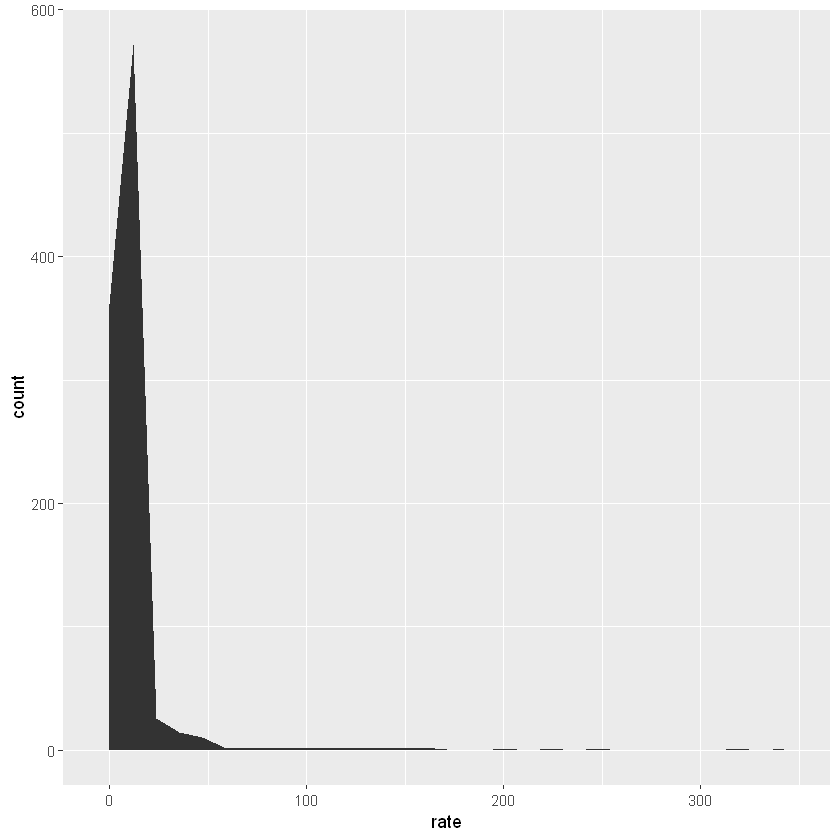

In [36]:
ggplot(tes_f_rates, aes(rate))+geom_area(stat = "bin")

In [10]:
i_tes_uvr <- tes_uvr_ns[-nrow(tes_uvr_ns),]
f_tes_uvr <- tes_uvr_ns[-1,]
delta_tes_uvr_ns <- f_tes_uvr - i_tes_uvr

In [13]:
summary(tes_uvr_ns) 

     beta_0             beta_1             beta_2             lambda   
 Min.   :-0.03172   Min.   :-0.14127   Min.   :-0.10238   Min.   :3.7  
 1st Qu.: 0.08206   1st Qu.:-0.05854   1st Qu.:-0.01466   1st Qu.:3.7  
 Median : 0.08882   Median :-0.04336   Median : 0.01870   Median :3.7  
 Mean   : 0.09619   Mean   :-0.04391   Mean   : 0.02938   Mean   :3.7  
 3rd Qu.: 0.10313   3rd Qu.:-0.02884   3rd Qu.: 0.05738   3rd Qu.:3.7  
 Max.   : 0.22068   Max.   : 0.10092   Max.   : 0.45919   Max.   :3.7  

**Notese que lambda es una constante, por eso no se incluye en el análisis de PCA**

In [12]:
pca_tes_uvr <- prcomp(delta_tes_uvr_ns[,1:3], scale=TRUE)
summary(pca_tes_uvr)

Importance of components:
                          PC1     PC2     PC3
Standard deviation     1.6857 0.39083 0.07464
Proportion of Variance 0.9472 0.05092 0.00186
Cumulative Proportion  0.9472 0.99814 1.00000

Dado que el componente principal nos da 94% de la variación. Nos quedamos unicamente con este

In [18]:
arima_pca_1_tes_uvr <- auto.arima(pca_tes_uvr$x[,1],stepwise = T,approximation = F)
Box.test(arima_pca_1_tes_uvr$residuals)


	Box-Pierce test

data:  arima_pca_1_tes_uvr$residuals
X-squared = 0.00085204, df = 1, p-value = 0.9767


In [25]:
sim_pca_1_tes_uvr <- replicate(expr = simulate(object = arima_pca_1_tes_uvr,nsim = future),n = simulations)
Bt1 <- pca_tes_uvr$rotation[,1] #Eigen values del primer componente


In [28]:
delta<-matrix(,nrow=future, ncol=simulations)

for (i in 1:future){
        for (j in 1:simulations){
                delta[i,j] <- sum(sim_pca_1_tes_uvr[i,j]*Bt1)
        }
}


In [29]:
f_ns_tes_uvr <- list()
alpha <- tes_uvr_ns[nrow(tes_uvr_ns),] 
alphanuevo <- alpha + 2
for (i in 1:simulations){
        newalph <- alpha
        for (j in 1:future){
                newalph <-  newalph + delta[j,i] 
                        if (j==260){
                                f_ns_tes_uvr <- append(f_ns_tes_uvr, newalph) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                        }
        }
}
mat_f_ns_tes_uvr <- matrix(f_ns_tes_uvr, ncol=4,byrow=T)
mat_f_ns_tes_uvr <- as.data.frame(mat_f_ns_tes_uvr )

In [ ]:
names(mat_f_ns_tes_uvr) <- c('beta_0','beta_1', 'beta_2', 'lambda')

In [ ]:
mat_f_ns_tes_uvr<- data.frame(lapply(mat_f_ns_tes_cop, function(x) as.numeric(x)))

In [ ]:
uvr_f_rates <- nelson_sieguel_rate(mat_f_ns_tes_uvr,0.5)

In [35]:
i_corp_usa <- corp_usa_ns[-nrow(corp_usa_ns),]
f_corp_usa <- corp_usa_ns[-1,]
delta_corp_usa_ns <- f_corp_usa - i_corp_usa

In [36]:
head(delta_corp_usa_ns)

,beta_0,beta_1,beta_2,lambda
,<dbl>,<dbl>,<dbl>,<dbl>
2009-10-14,0.26974428,-0.32308707,0.52626276,-0.07359831
2009-10-15,-0.12423572,0.12326676,-0.47464279,0.07359831
2009-10-16,-0.05640593,0.18798050,-0.15169724,0.00000000
2009-10-19,-0.05557738,0.01640991,0.11722380,0.00000000
2009-10-20,-0.01920371,0.01273971,-0.13088711,0.00000000
2009-10-21,0.06431601,-0.09982943,-0.01404811,0.00000000


In [37]:
pca_corp_usa <- prcomp(delta_corp_usa_ns, scale=TRUE)
summary(pca_corp_usa)

Importance of components:
                          PC1   PC2     PC3     PC4
Standard deviation     1.5543 1.147 0.49601 0.14860
Proportion of Variance 0.6039 0.329 0.06151 0.00552
Cumulative Proportion  0.6039 0.933 0.99448 1.00000

Los primeros 2 componentes capturan el 94 % de la variación por lo que se hace el análisis con ambos.

In [38]:
arima_pca_1_corp_usa <- auto.arima(pca_corp_usa$x[,1],stepwise = T,approximation = F)
Box.test(arima_pca_1_corp_usa$residuals)
arima_pca_2_corp_usa  <- auto.arima(pca_corp_usa$x[,2],stepwise = T,approximation = F)
Box.test(arima_pca_1_corp_usa$residuals)



	Box-Pierce test

data:  arima_pca_1_corp_usa$residuals
X-squared = 0.0030951, df = 1, p-value = 0.9556



	Box-Pierce test

data:  arima_pca_1_corp_usa$residuals
X-squared = 0.0030951, df = 1, p-value = 0.9556


In [40]:
sim_pca_1_corp_usa <- replicate(expr = simulate(object = arima_pca_1_corp_usa,nsim = future),n = simulations)
sim_pca_2_corp_usa <- replicate(expr = simulate(object =arima_pca_2_corp_usa,nsim = future),n = simulations)
Bt1 <- pca_corp_usa$rotation[,1] #Eigen values del primer componente
Bt2 <- pca_corp_usa$rotation[,2] #Eigen values del segundo componente

In [42]:
delta<-matrix(,nrow=future, ncol=simulations)

for (i in 1:future){
        for (j in 1:simulations){
                delta[i,j] <- sum(sim_pca_1_corp_usa[i,j]*Bt1)+sum(sim_pca_2_corp_usa[i,j]*Bt2)
        }
}


In [43]:
f_ns_corp_usa <- list()
alpha <- corp_usa_ns[nrow(tes_cop_ns),] 
alphanuevo <- alpha + 2
for (i in 1:simulations){
        newalph <- alpha
        for (j in 1:future){
                newalph <-  newalph + delta[j,i] 
                        if (j==260){
                                f_ns_corp_usa <- append(f_ns_corp_usa, newalph) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                        }
        }
}
mat_f_ns_corp_usa <- matrix(f_ns_corp_usa, ncol=4,byrow=T)
mat_f_ns_corp_usa <- as.data.frame(mat_f_ns_corp_usa )

In [44]:
names(mat_f_ns_corp_usa) <- c('beta_0','beta_1', 'beta_2', 'lambda')

In [45]:
mat_f_ns_corp_usa<- data.frame(lapply(mat_f_ns_corp_usa, function(x) as.numeric(x)))

In [51]:
summary(mat_f_ns_corp_usa)
summary(corp_usa_ns)

     beta_0             beta_1            beta_2            lambda        
 Min.   :-14.6913   Min.   :-21.410   Min.   :-22.292   Min.   :-18.9215  
 1st Qu.:  0.3466   1st Qu.: -6.372   1st Qu.: -7.254   1st Qu.: -3.8836  
 Median :  4.9406   Median : -1.778   Median : -2.660   Median :  0.7104  
 Mean   :  4.9535   Mean   : -1.766   Mean   : -2.647   Mean   :  0.7233  
 3rd Qu.:  9.5684   3rd Qu.:  2.849   3rd Qu.:  1.968   3rd Qu.:  5.3383  
 Max.   : 26.3094   Max.   : 19.590   Max.   : 18.708   Max.   : 22.0792  

     beta_0           beta_1            beta_2            lambda      
 Min.   : 3.229   Min.   :-10.415   Min.   :-7.2610   Min.   :0.1216  
 1st Qu.: 4.799   1st Qu.: -6.305   1st Qu.:-4.6519   1st Qu.:0.1939  
 Median : 5.671   Median : -4.996   Median :-3.6463   Median :0.2657  
 Mean   : 5.865   Mean   : -5.001   Mean   :-3.1210   Mean   :0.2910  
 3rd Qu.: 6.760   3rd Qu.: -3.614   3rd Qu.:-0.8426   3rd Qu.:0.4219  
 Max.   :10.781   Max.   : -1.194   Max.   : 0.1801   Max.   :1.0000  

In [ ]:
tes_f_rates <- nelson_sieguel_rate(mat_f_ns_corp_usa,0.5)

In [52]:
i_index <- index[-nrow(index),]
f_index <- index[-1,]
delta_index <- f_index - i_index

In [69]:
arima_colcap <- auto.arima(delta_index[,1],stepwise = T,approximation = F)
Box.test(arima_colcap$residuals)
arima_spx  <- auto.arima(delta_index[,2],stepwise = T,approximation = F)
Box.test(arima_spx$residuals)


	Box-Pierce test

data:  arima_colcap$residuals
X-squared = 4.1225e-05, df = 1, p-value = 0.9949



	Box-Pierce test

data:  arima_spx$residuals
X-squared = 0.75103, df = 1, p-value = 0.3862


In [70]:
sim_arima_colcap <- replicate(expr = simulate(object = arima_colcap,nsim = future),n = simulations)
sim_arima_spx <- replicate(expr = simulate(object =arima_spx,nsim = future),n = simulations)

In [76]:
f_colcap <- list()
f_spx <- list()
alpha_1 <- ipc$ipc[nrow(index),1] 
alpha_2 <- index[nrow(index),2] 
for (i in 1:simulations){
        newalph_1 <- alpha_1
        newalph_2 <- alpha_2
        for (j in 1:future){
                newalph_1 <-  newalph_1 + sim_arima_colcap[j,i] 
                newalph_2 <-  newalph_2 + sim_arima_spx[j,i] 
                        if (j==260){
                                f_colcap <- append(f_colcap, newalph_1) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                                f_spx <- append(f_spx, newalph_2)
                        }
        }
}
mat_f_colcap <- matrix(f_colcap, ncol=1,byrow=T)
mat_f_colcap <- as.data.frame(mat_f_colcap)
mat_f_spx <- matrix(f_spx, ncol=1,byrow=T)
mat_f_spx <- as.data.frame(mat_f_spx)

In [77]:
mat_f_colcap<- data.frame(lapply(mat_f_colcap, function(x) as.numeric(x)))
mat_f_spx<- data.frame(lapply(mat_f_spx, function(x) as.numeric(x)))

In [78]:
summary(mat_f_colcap)
summary(index[,1])
summary(mat_f_spx)
summary(index[,2])

       V1        
 Min.   : 723.9  
 1st Qu.:1436.2  
 Median :1631.8  
 Mean   :1622.8  
 3rd Qu.:1815.7  
 Max.   :2533.5  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    894    1347    1495    1494    1653    1942 

       V1      
 Min.   :3928  
 1st Qu.:4641  
 Median :4839  
 Mean   :4831  
 3rd Qu.:5038  
 Max.   :5705  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1023    1435    2089    2284    2820    4797 

In [108]:
i_ipc <- ipc$ipc[-nrow(ipc)]
f_ipc <- ipc$ipc[-1]
delta_ipc <- f_ipc - i_ipc

In [109]:
i_trm <- trm$trm[-nrow(trm)]
f_trm <- trm$trm[-1]
delta_trm <- f_trm - i_trm

In [110]:
arima_ipc <- auto.arima(delta_ipc,stepwise = T,approximation = F)
Box.test(arima_ipc$residuals)
arima_trm  <- auto.arima(delta_trm,stepwise = T,approximation = F)
Box.test(arima_trm$residuals)


	Box-Pierce test

data:  arima_ipc$residuals
X-squared = 1.4667, df = 1, p-value = 0.2259



	Box-Pierce test

data:  arima_trm$residuals
X-squared = 0.00036673, df = 1, p-value = 0.9847


In [111]:
sim_arima_ipc <- replicate(expr = simulate(object = arima_ipc,nsim = future),n = simulations)
sim_arima_trm <- replicate(expr = simulate(object =arima_trm,nsim = future),n = simulations)

In [112]:
f_ipc <- list()
f_trm <- list()
alpha_1 <- ipc$ipc[nrow(ipc)] 
alpha_2 <- trm$trm[nrow(trm)] 
for (i in 1:simulations){
        newalph_1 <- alpha_1
        newalph_2 <- alpha_2
        for (j in 1:future){
                newalph_1 <-  newalph_1 + sim_arima_ipc[j,i] 
                newalph_2 <-  newalph_2 + sim_arima_trm[j,i] 
                        if (j==260){
                                f_ipc <- append(f_ipc, newalph_1) #Guardamos unicamente los resultados del último periodo pues es la frontera a un año
                                f_trm <- append(f_trm, newalph_2)
                        }
        }
}
mat_f_ipc <- matrix(f_ipc, ncol=1,byrow=T)
mat_f_ipc <- as.data.frame(mat_f_ipc)
mat_f_trm <- matrix(f_trm, ncol=1,byrow=T)
mat_f_trm <- as.data.frame(mat_f_trm)

In [113]:
mat_f_ipc<- data.frame(lapply(mat_f_ipc, function(x) as.numeric(x)))
mat_f_trm<- data.frame(lapply(mat_f_trm, function(x) as.numeric(x)))


In [114]:
summary(mat_f_ipc)
summary(ipc)
summary(mat_f_trm)
summary(trm)

       V1        
 Min.   :-66.04  
 1st Qu.:280.57  
 Median :354.08  
 Mean   :357.35  
 3rd Qu.:437.31  
 Max.   :738.79  

      Date                          ipc           
 Min.   :1954-07-31 00:00:00   Min.   :  0.02576  
 1st Qu.:1971-06-30 00:00:00   1st Qu.:  0.12935  
 Median :1988-05-31 00:00:00   Median :  4.16885  
 Mean   :1988-05-30 20:48:42   Mean   : 28.11323  
 3rd Qu.:2005-04-30 00:00:00   3rd Qu.: 57.71621  
 Max.   :2022-03-31 00:00:00   Max.   :116.26000  

       V1      
 Min.   :3179  
 1st Qu.:3662  
 Median :3825  
 Mean   :3828  
 3rd Qu.:3974  
 Max.   :4551  

      Date                          trm        
 Min.   :1991-11-27 00:00:00   Min.   : 620.6  
 1st Qu.:1999-07-01 12:00:00   1st Qu.:1699.7  
 Median :2007-02-03 00:00:00   Median :2103.1  
 Mean   :2007-02-03 00:00:00   Mean   :2134.1  
 3rd Qu.:2014-09-07 12:00:00   3rd Qu.:2816.6  
 Max.   :2022-04-12 00:00:00   Max.   :4153.9  

## Proyección conjunta

In [72]:
delta_joint <- apply(joint[,-c(1)],2,function(x){returns(x,method = 'simple')}) 
delta_joint[which(!is.finite(delta_joint))] = 0

In [81]:
summary(delta_joint)

   tes_cop_6m          tes_cop_1y          tes_cop_3y        
 Min.   :-0.313196   Min.   :-0.310856   Min.   :-0.2787839  
 1st Qu.:-0.045226   1st Qu.:-0.042053   1st Qu.:-0.0481881  
 Median : 0.003686   Median : 0.006363   Median :-0.0009985  
 Mean   : 0.009997   Mean   : 0.009246   Mean   : 0.0088413  
 3rd Qu.: 0.041403   3rd Qu.: 0.037636   3rd Qu.: 0.0451324  
 Max.   : 0.495530   Max.   : 0.409173   Max.   : 0.4403006  
   tes_cop_5y         tes_cop_10y         tes_cop_15y       
 Min.   :-0.226516   Min.   :-0.121380   Min.   :-0.107717  
 1st Qu.:-0.044270   1st Qu.:-0.029781   1st Qu.:-0.030805  
 Median : 0.000000   Median :-0.004366   Median :-0.005072  
 Mean   : 0.008135   Mean   : 0.006614   Mean   : 0.005613  
 3rd Qu.: 0.040290   3rd Qu.: 0.036152   3rd Qu.: 0.036079  
 Max.   : 0.367116   Max.   : 0.255792   Max.   : 0.208925  
   tes_uvr_6m          tes_uvr_1y          tes_uvr_3y       
 Min.   :-0.157812   Min.   :-0.109865   Min.   :-0.132972  
 1st Qu.:-0.03044

In [85]:
mean_delta_joint = colMeans(delta_joint)

In [20]:
pca_joint <- prcomp(delta_joint[, -c(1)], scale=TRUE, center=TRUE)
summary(pca_joint)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     3.1726 2.3737 1.5267 1.29148 1.07610 0.83226 0.70800
Proportion of Variance 0.4376 0.2450 0.1013 0.07252 0.05035 0.03012 0.02179
Cumulative Proportion  0.4376 0.6826 0.7839 0.85644 0.90679 0.93690 0.95870
                           PC8     PC9   PC10    PC11   PC12    PC13    PC14
Standard deviation     0.58944 0.53964 0.3426 0.30083 0.2091 0.14147 0.12737
Proportion of Variance 0.01511 0.01266 0.0051 0.00393 0.0019 0.00087 0.00071
Cumulative Proportion  0.97380 0.98646 0.9916 0.99550 0.9974 0.99827 0.99898
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.10168 0.08478 0.05180 0.04288 0.03365 0.01786
Proportion of Variance 0.00045 0.00031 0.00012 0.00008 0.00005 0.00001
Cumulative Proportion  0.99943 0.99974 0.99986 0.99994 0.99999 1.00000
                            PC21      PC22      PC23
Standard deviation     1.

In [96]:
pca_joint <- prcomp(delta_joint)
summary(pca_joint)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     0.4419 0.2206 0.1587 0.11715 0.09059 0.05874 0.04549
Proportion of Variance 0.6482 0.1616 0.0836 0.04557 0.02725 0.01146 0.00687
Cumulative Proportion  0.6482 0.8098 0.8934 0.93901 0.96625 0.97771 0.98458
                           PC8     PC9    PC10    PC11    PC12    PC13     PC14
Standard deviation     0.03738 0.03188 0.02940 0.02507 0.01597 0.01443 0.008679
Proportion of Variance 0.00464 0.00337 0.00287 0.00209 0.00085 0.00069 0.000250
Cumulative Proportion  0.98922 0.99259 0.99546 0.99755 0.99840 0.99909 0.999340
                           PC15     PC16    PC17     PC18     PC19     PC20
Standard deviation     0.007734 0.007478 0.00526 0.005036 0.004197 0.003601
Proportion of Variance 0.000200 0.000190 0.00009 0.000080 0.000060 0.000040
Cumulative Proportion  0.999540 0.999720 0.99981 0.999900 0.999960 1.000000
                            PC21      PC22    

In [97]:
arima_pca_1_joint <- auto.arima(pca_joint$x[,1],stepwise = T,approximation = F)
Box.test(arima_pca_1_joint$residuals)
arima_pca_2_joint <- auto.arima(pca_joint$x[,2],stepwise = T,approximation = F)
Box.test(arima_pca_2_joint$residuals)
arima_pca_3_joint <- auto.arima(pca_joint$x[,3],stepwise = T,approximation = F)
Box.test(arima_pca_3_joint$residuals)


	Box-Pierce test

data:  arima_pca_1_joint$residuals
X-squared = 0.070259, df = 1, p-value = 0.791



	Box-Pierce test

data:  arima_pca_2_joint$residuals
X-squared = 0.0080964, df = 1, p-value = 0.9283



	Box-Pierce test

data:  arima_pca_3_joint$residuals
X-squared = 1.0632, df = 1, p-value = 0.3025


In [98]:
sim_pca_1_joint <- replicate(expr = simulate(object = arima_pca_1_joint,nsim = future),n = simulations)
sim_pca_2_joint <- replicate(expr = simulate(object =arima_pca_2_joint,nsim = future),n = simulations)
sim_pca_3_joint <- replicate(expr = simulate(object =arima_pca_3_joint,nsim = future),n = simulations)

In [99]:
sim_pca_1_joint_r <- sapply(sim_pca_1_joint,function(x){scale(x%*%t(pca_joint$rotation[,1]), center = -pca_joint$center, scale = F)})
sim_pca_2_joint_r <- sapply(sim_pca_1_joint,function(x){scale(x%*%t(pca_joint$rotation[,2]), center = -pca_joint$center, scale = F)})
sim_pca_3_joint_r <- sapply(sim_pca_1_joint,function(x){scale(x%*%t(pca_joint$rotation[,3]), center = -pca_joint$center, scale = F)})

In [100]:
sim_pca_1_joint_r <- t(sim_pca_1_joint_r)
sim_pca_2_joint_r <- t(sim_pca_2_joint_r)
sim_pca_3_joint_r <- t(sim_pca_3_joint_r)

In [101]:
sum_sims <- sim_pca_1_joint_r+ sim_pca_2_joint_r+sim_pca_3_joint_r

In [102]:
sum_sims_df <- as.data.frame(sum_sims)

In [103]:
summary(sum_sims_df)

       V1                 V2                 V3                 V4          
 Min.   :-0.34300   Min.   :-0.38008   Min.   :-0.53924   Min.   :-0.67069  
 1st Qu.:-0.02194   1st Qu.:-0.02904   1st Qu.:-0.05224   1st Qu.:-0.07237  
 Median : 0.03044   Median : 0.02823   Median : 0.02721   Median : 0.02525  
 Mean   : 0.03062   Mean   : 0.02843   Mean   : 0.02748   Mean   : 0.02558  
 3rd Qu.: 0.08324   3rd Qu.: 0.08595   3rd Qu.: 0.10729   3rd Qu.: 0.12363  
 Max.   : 0.36820   Max.   : 0.39752   Max.   : 0.53953   Max.   : 0.65468  
       V5                 V6                 V7                 V8          
 Min.   :-0.79302   Min.   :-0.83115   Min.   :-0.73817   Min.   :-0.93865  
 1st Qu.:-0.09332   1st Qu.:-0.10122   1st Qu.:-0.08429   1st Qu.:-0.11568  
 Median : 0.02083   Median : 0.01787   Median : 0.02239   Median : 0.01859  
 Mean   : 0.02122   Mean   : 0.01828   Mean   : 0.02276   Mean   : 0.01905  
 3rd Qu.: 0.13588   3rd Qu.: 0.13789   3rd Qu.: 0.12991   3rd Qu.: 0.15391  

In [104]:
sum_sims_df$index <- c(0, rep(1:(nrow(sum_sims_df)-1)%/%260))

In [105]:
sum_sims_collapsed <- group_by(sum_sims_df, index) %>%
  summarise_all(list(sum))

In [109]:
colnames(sum_sims_collapsed)[-c(1)]  <- colnames(joint)[-c(1)] 

In [110]:
summary(sum_sims_collapsed)

     index         tes_cop_6m        tes_cop_1y        tes_cop_3y    
 Min.   :  0.0   Min.   : 0.6428   Min.   :-0.6116   Min.   :-3.957  
 1st Qu.:249.8   1st Qu.: 6.5682   1st Qu.: 5.8670   1st Qu.: 5.031  
 Median :499.5   Median : 7.9747   Median : 7.4048   Median : 7.164  
 Mean   :499.5   Mean   : 7.9624   Mean   : 7.3913   Mean   : 7.146  
 3rd Qu.:749.2   3rd Qu.: 9.4489   3rd Qu.: 9.0166   3rd Qu.: 9.400  
 Max.   :999.0   Max.   :14.5604   Max.   :14.6053   Max.   :17.154  
   tes_cop_5y      tes_cop_10y       tes_cop_15y        tes_uvr_6m    
 Min.   :-6.989   Min.   :-10.434   Min.   :-11.889   Min.   :-8.990  
 1st Qu.: 4.054   1st Qu.:  2.479   1st Qu.:  1.582   1st Qu.: 3.078  
 Median : 6.675   Median :  5.544   Median :  4.780   Median : 5.942  
 Mean   : 6.652   Mean   :  5.517   Mean   :  4.752   Mean   : 5.917  
 3rd Qu.: 9.422   3rd Qu.:  8.757   3rd Qu.:  8.131   3rd Qu.: 8.944  
 Max.   :18.948   Max.   : 19.896   Max.   : 19.752   Max.   :19.355  
   tes_uvr_1y

# Calibración de la curva

In [67]:
gamma <- log(0.6)/log(0.3)
gamma

[1] 0.4242834

In [68]:
1- gamma

[1] 0.5757166

# Restricción del activo

In [125]:
install.packages('quadprog')

Installing package into 'C:/Users/Diana C Contreras/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'quadprog' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'quadprog'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\Diana C Contreras\Documents\R\win-library\3.6\00LOCK\quadprog\libs\x64\quadprog.dll  a C:\Users\Diana C Contreras\Documents\R\win-library\3.6\quadprog\libs\x64\quadprog.dll: Permission denied"Warning message:
"restored 'quadprog'"


The downloaded binary packages are in
	C:\Users\Diana C Contreras\AppData\Local\Temp\Rtmpmaq3rz\downloaded_packages


In [126]:
library('quadprog')

In [149]:
varcov <- cov(sum_sims_collapsed[,c(2:22)])

In [138]:
returns <- colMeans(sum_sims_collapsed[,c(2:22)])
returns

tes_cop_6m   tes_cop_1y   tes_cop_3y   tes_cop_5y  tes_cop_10y  tes_cop_15y 
   7.9623553    7.3912627    7.1455558    6.6516435    5.5171582    4.7517526 
  tes_uvr_6m   tes_uvr_1y   tes_uvr_3y   tes_uvr_5y  tes_uvr_10y  tes_uvr_15y 
   5.9169210    4.9528365    4.7204037    4.8363885    4.9573222    5.0036303 
 corp_usa_3m  corp_usa_6m  corp_usa_1y  corp_usa_3y  corp_usa_5y corp_usa_10y 
  29.7700709   28.0029268   26.4078743   18.6160531   12.6168113    4.7874996 
corp_usa_15y       colcap          spx 
   1.1481306    0.6281055   12.8420699

In [151]:
one<- matrix(1, nrow = 1, ncol = 21) #Matrix that defines the  "greater or equal to" restriction. 
minusone<- matrix(0, nrow = 1, ncol = 21) #Matrix that defines "less or equal to" restriction
sumone <- rbind(one, minusone) #Matrix of constraints of x 
Amat <- sumone
b0 <- c(1,-1) # Lower bounds
b0

[1]  1 -1

In [146]:
fn3<- function(phi){
  res <- solve.QP(Dmat=varcov, dvec=1/phi*returns, Amat=t(Amat), bvec=b0)
  return(res$solution)
}

In [152]:
fn3(0.424283357506555)

ERROR: Error in solve.QP(Dmat = varcov, dvec = 1/phi * returns, Amat = t(Amat), : matrix D in quadratic function is not positive definite!
